In this noteboook, the geometry of cpw sections constituting a Bragg resonator are specified, and the transmission is siumulated and plotted. Parameters such as the Q factor can then be extracted.

In [2]:
import ResonatorOptimizer as ro
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn-deep')

In [3]:
# Global Parameters
__er = 11.9
__fo = 7.3e09
__h = 500e-06
__t = 50e-09
__pen_depth = 39e-09
__total_width = 43.6e-06
__length = 8102.64e-06
freq = np.linspace(2,12,50000)*1e09

__keyind = lambda X,X_array: min(enumerate(X_array), key=lambda x: abs(x[1]-X))

In [8]:
# Instantiate bragg class
br = ro.Bragg(__fo,__er,__h,__t,__pen_depth)

# Specify bragg sections
cav_width, cav_gap, cav_length = [21.6e-06, 11.1e-06, 8102.64e-06]
cavity = br.cpw_section(cav_width, cav_gap, cav_length)

lowZ_width, lowZ_gap, lowZ_length = [36.6e-06, 3.6e-06, 4091.32e-06]
lowZ = br.cpw_section(lowZ_width, lowZ_gap, lowZ_length)
lowZ_length = .5*(1 / (2 * cavity.resonant_freq()* np.sqrt(lowZ.capacitance_per_length() * lowZ.Ltotal() ) ))

highZ_width, highZ_gap, highZ_length = [7.8e-06, 18e-06, 3566.32e-06]
highZ = br.cpw_section(highZ_width, highZ_gap, highZ_length)
highZ_length = .5*(1 / (2 * cavity.resonant_freq()* np.sqrt(highZ.capacitance_per_length() * highZ.Ltotal() ) ))

# Get S21 for the bragg resonator
bragg = br.bragg_resonator(freq,lowZ, highZ, cavity)

0.003568420375409007


In [12]:
print(cav_length*1e06)
print(lowZ_length*1e06)
print(highZ_length*1e06)

8102.639999999999
4090.683837273866
3568.4203754090067


In [98]:
# Get Bragg data for extracting Q
# freq_nb = np.linspace(7.1954,7.1957,500)*1e09
freq_nb = np.linspace(7.1941,7.1944,500)*1e09
bragg_nb = br.bragg_resonator(freq_nb,lowZ, highZ, cavity) # for Q

rofit = ro.ResonatorFitting()
fit = rofit.LorentzianFit(freq_nb,bragg_nb,plot=False)
Q = fit.Q.values[0]
f0 = fit.centre.values[0]*1e06

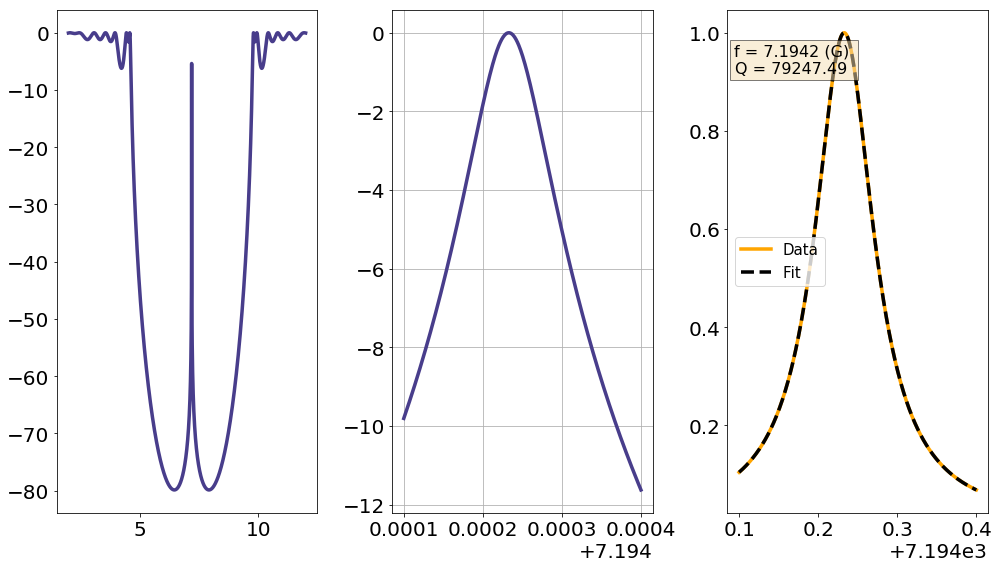

In [99]:
fig = plt.figure(figsize=(14,8))

ax0 = fig.add_subplot(131)
plt.plot(freq*1e-09,bragg,color = 'darkslateblue')

ax1 = fig.add_subplot(132)
plt.plot(freq_nb*1e-09,bragg_nb,color = 'darkslateblue')
plt.grid()

ax2 = fig.add_subplot(133)
plt.plot(fit.x,fit.y,color = 'orange', label = 'Data')
plt.plot(fit.x,fit.fit,'--',color = 'k',label = 'Fit')
plt.text(0.255, 0.9, 'f = {:.4f} (G) \nQ = {:.2f} '.format(f0*1e-09,Q), horizontalalignment='center',
     verticalalignment='center', transform=ax2.transAxes,fontsize=16,bbox=dict(facecolor='wheat', alpha=0.5))
plt.legend(loc='center left')

plt.tight_layout()
plt.show()